In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D, Activation, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')
!ls "/content/drive/My Drive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Barcelona	       Europass				     NN
'challenge 2.avi'     'Foglio di lavoro senza nome.gsheet'   ROC.gsheet
'Colab Notebooks'     'forces in fluids.gsheet'		     USB
'cours physique.zip'   kreisel.gsheet
 elasticity.gsheet    'Magn hysteresis.gsheet'


In [ ]:
data = np.load("/content/drive/My Drive/NN/data/testing_data.npy").astype(np.float32)

loaded_events = data.shape[0]
n_samples = data.shape[1]
n_channels = data.shape[2]

#X_test = np.reshape(data, (loaded_events, -1))#reshape for fc network
X_test = np.expand_dims(data, axis=-1) #for cnn network


# define labels with one hot encoding, (1,0) -> noise, (0,1) -> signal
test_label = np.zeros((loaded_events, 2))
test_label[:25000, 1] = 1
test_label[25000:, 0] = 1


tot_n = int(test_label[25000:,0].sum())
tot_s = int(test_label[:25000,1].sum())

print(data.shape, test_label.shape)

(950000, 256, 1) (950000, 2)


In [ ]:
# define labels with one hot encoding, (1,0) -> noise, (0,1) -> signal
y = np.zeros((200000, 2))
y[:100000, 0] = 1
y[100000:, 1] = 1

In [ ]:
#########################
###second part of code###
#########################

#model prediction + efficiency curve

yy = np.log10(np.linspace(10 ** 0.00001, 10 ** 0.99999998, 10000))

models = ['model_conv1D_2l_10_5', 'model_conv1D_2l_10_10', 'model_conv1D_2l_10_15', 'model_conv1D_2l_10_20']#, 'model_fc_1l_64', 'model_fc_4l_64', 'model_fc_1l_128', 'model_fc_4l_128', 'model_fc_1l_256', 'model_fc_4l_200', 'model_fc_4l_256', 'model_fc_4l_350']
labs = ['5', '10', '15', '20']

n_vec = np.zeros((10000, len(models)))
s_vec = np.zeros((10000, len(models)))

In [ ]:
"""model_fc = keras.models.load_model(f'/content/drive/My Drive/NN/test_train_split/model_fc_2l_64.h5', compile=False)
y_pred_fc = model_fc.predict(np.reshape(X_test, (X_test.shape[0], -1))) #X_test, or np.reshape(X_test, (X_test.shape[0], -1))

s_should_fc = []
n_should_fc  = []

sfc = np.zeros_like(yy)
nfc = np.zeros_like(yy)

for i in range(len(y_pred_fc[:,0])):
  if y_testfc[i,1] == 1:
    s_should_fc.append(y_pred_fc[i,1])

  else:
    n_should_fc.append(y_pred_fc[i,1])


for iT, threshold in enumerate(yy):
  eff_signal = np.sum((s_should_fc > threshold) == True) / tot_s
  sfc[iT] = eff_signal
  eff_noise = np.sum((n_should_fc > threshold) == False) / tot_n
    
  if eff_noise < 1:
    reduction_factor = np.log10(1 / (1 - eff_noise))
  else:
      reduction_factor = np.log10(tot_n)
  nfc[iT] = 10 ** reduction_factor"""


"model_fc = keras.models.load_model(f'/content/drive/My Drive/NN/test_train_split/model_fc_2l_64.h5', compile=False)\ny_pred_fc = model_fc.predict(np.reshape(X_test, (X_test.shape[0], -1))) #X_test, or np.reshape(X_test, (X_test.shape[0], -1))\n\ns_should_fc = []\nn_should_fc  = []\n\nsfc = np.zeros_like(yy)\nnfc = np.zeros_like(yy)\n\nfor i in range(len(y_pred_fc[:,0])):\n  if y_testfc[i,1] == 1:\n    s_should_fc.append(y_pred_fc[i,1])\n\n  else:\n    n_should_fc.append(y_pred_fc[i,1])\n\n\nfor iT, threshold in enumerate(yy):\n  eff_signal = np.sum((s_should_fc > threshold) == True) / tot_s\n  sfc[iT] = eff_signal\n  eff_noise = np.sum((n_should_fc > threshold) == False) / tot_n\n    \n  if eff_noise < 1:\n    reduction_factor = np.log10(1 / (1 - eff_noise))\n  else:\n      reduction_factor = np.log10(tot_n)\n  nfc[iT] = 10 ** reduction_factor"

In [ ]:
for k in range(len(n_vec[0,:])):
  sss = np.zeros_like(yy)
  nnn = np.zeros_like(yy)
  var = str((k+1)*5)

  model_name = models[k]
  print(model_name)
  model = keras.models.load_model(f'/content/drive/My Drive/NN/train_all/'+model_name+'.h5', compile=False)
  y_pred = model.predict(X_test) #X_test, or np.reshape(X_test, (X_test.shape[0], -1))
  print(y_pred)

  for iT, threshold in enumerate(yy):
      eff_signal = np.sum((y_pred[:25000, 1] > threshold) == True) / tot_s
      sss[iT] = eff_signal
      eff_noise = np.sum((y_pred[25000:, 1] > threshold) == False) / tot_n
      if (eff_noise < 1):
          reduction_factor = np.log10(1 / (1 - eff_noise))
      else:
          reduction_factor = np.log10(tot_n)
      nnn[iT] = 10 ** reduction_factor


  s_vec[:,k] = sss
  n_vec[:,k] = nnn

print(s_vec[500,2], s_vec[500,3])

model_conv1D_2l_10_5
[[0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 ...
 [9.9999988e-01 1.2591747e-07]
 [9.9999952e-01 4.7418382e-07]
 [9.9999750e-01 2.4652904e-06]]
model_conv1D_2l_10_10
[[0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 ...
 [9.9999976e-01 2.0340651e-07]
 [9.9999905e-01 1.0017762e-06]
 [9.9999630e-01 3.7002346e-06]]
model_conv1D_2l_10_15
[[0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 ...
 [9.9999976e-01 2.4905043e-07]
 [9.9999762e-01 2.3664736e-06]
 [9.9999511e-01 4.9159976e-06]]
model_conv1D_2l_10_20
[[0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 ...
 [9.9999559e-01 4.4091116e-06]
 [9.9999619e-01 3.8255321e-06]
 [9.9999154e-01 8.4406429e-06]]
0.99708 0.99648


In [ ]:
print(n_vec[0])
print(s_vec.shape[0])


[2.63344446 3.60477623 2.58676137 2.51370991]
10000


In [ ]:
#calculate signals at noise>10**5
s_at_noise = []

for k in range(len(n_vec[0,:])):
  o = 0
  n = n_vec[:,k]
  s = s_vec[:,k]
  model_name = models[k]


  
  while n[o] < 10**4:
    o+=1
  
  if s[o] == 0:
    while s[o] == 0:
      o-=1
  
  print(f'Noise rejection factor for {model_name} at 10⁵ (10e({np.log10(n[o])})) = {s[o]*100}%')
  print(s[o])

  s_at_noise.append(s[o])
    
#  for i in range(len(n)):
 #   if n[i] == n[o]:
  #    s_at_noise.append(s[i])
      

print('Ave: ', np.mean(s_at_noise))
print('std: ', np.std(s_at_noise))

Noise rejection factor for model_conv1D_2l_10_5 at 10⁵ (10e(4.0023539053935675)) = 99.10799999999999%
0.99108
Noise rejection factor for model_conv1D_2l_10_10 at 10⁵ (10e(4.0023539053935675)) = 99.47200000000001%
0.99472
Noise rejection factor for model_conv1D_2l_10_15 at 10⁵ (10e(4.0023539053935675)) = 99.388%
0.99388
Noise rejection factor for model_conv1D_2l_10_20 at 10⁵ (10e(4.0023539053935675)) = 99.336%
0.99336
Ave:  0.99326
std:  0.0013489254983134074


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

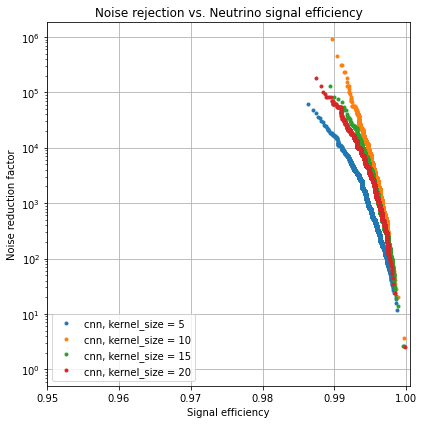

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
#ax.plot(sfc, nfc,'.', label='FCN')
for i in range(s_vec.shape[1]):
  ax.plot(s_vec[:,i], n_vec[:,i],'.', label='cnn, kernel_size = ' + labs[i])
plt.xlim(0.95, 1.0005)
#plt.ylim(10**(-0.1), 10**5)
ax.set_xlabel("Signal efficiency")
ax.set_ylabel("Noise reduction factor")
ax.semilogy(True)
ax.grid(True)
ax.legend()
ax.set_title("Noise rejection vs. Neutrino signal efficiency")
fig.tight_layout()
fig.savefig("eff_cnn_2l_10_kernel.png", bbox_inches="tight", dpi=125)
files.download("eff_cnn_2l_10_kernel.png")
plt.show()